<a href="https://colab.research.google.com/github/padma31-priya31/My-project/blob/main/loan_approval_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import SMOTE

sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scikit-learn==0.18.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  error: subprocess-exited-with-error
  
  × Running setup.py install for scikit-learn did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Ru

In [ ]:
df=pd.read_csv("/content/Loan_Default.csv")

In [ ]:
df.head(5)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [ ]:
df.shape

(148670, 34)

In [ ]:
pd.set_option("display.max_columns", df.shape[-1])
df.head(5)


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [ ]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [ ]:
#Will be preferred to convert all features to lower case

In [ ]:
df.columns= df.columns.str.lower()

In [ ]:
df.columns

Index(['id', 'year', 'loan_limit', 'gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'credit_worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_rate_spread', 'upfront_charges', 'term', 'neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'income', 'credit_type', 'credit_score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'ltv', 'region', 'security_type',
       'status', 'dtir1'],
      dtype='object')

In [ ]:
#Filtering data ,since there are large number of unuseful columns which can be dropped without a bad effect on the performance
#of the model

In [ ]:
# we can drpo 'id' ,'loan_limit' , 'gender' ,'approv_in_adv' ,'loan_purpose' ,'open_credit' ,'business_or_commercial'  because they don't add any valiable information
# we can drop 'year' as it includes only one year 2019

columns= ['id', 'year', 'loan_limit', 'gender', 'approv_in_adv','loan_purpose', 'credit_worthiness', 'open_credit','business_or_commercial','interest_rate_spread', 'upfront_charges', 'neg_ammortization','interest_only', 'lump_sum_payment','construction_type', 'occupancy_type', 'secured_by', 'total_units','credit_type', 'co-applicant_credit_type','submission_of_application', 'ltv', 'region', 'security_type']
df.drop(columns,axis=1, inplace =True)

In [ ]:
df.columns

Index(['loan_type', 'loan_amount', 'rate_of_interest', 'term',
       'property_value', 'income', 'credit_score', 'age', 'status', 'dtir1'],
      dtype='object')

In [ ]:
df.shape

(148670, 10)

In [ ]:
pd.set_option("display.max_columns", df.shape[-1])
df.head()

,loan_type,loan_amount,rate_of_interest,term,property_value,income,credit_score,age,status,dtir1
0,type1,116500,NaN,360.0,118000.0,1740.0,758,25-34,1,45.0
1,type2,206500,NaN,360.0,NaN,4980.0,552,55-64,1,NaN
2,type1,406500,4.56,360.0,508000.0,9480.0,834,35-44,0,46.0
3,type1,456500,4.25,360.0,658000.0,11880.0,587,45-54,0,42.0
4,type1,696500,4.00,360.0,758000.0,10440.0,602,25-34,0,39.0


In [ ]:
df.shape

(148670, 10)

In [ ]:
df.duplicated().sum()

6

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(148664, 10)

In [ ]:
df.isna().sum()

loan_type               0
loan_amount             0
rate_of_interest    36437
term                   41
property_value      15096
income               9146
credit_score            0
age                   200
status                  0
dtir1               24115
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148664 entries, 0 to 148669
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_type         148664 non-null  object 
 1   loan_amount       148664 non-null  int64  
 2   rate_of_interest  112227 non-null  float64
 3   term              148623 non-null  float64
 4   property_value    133568 non-null  float64
 5   income            139518 non-null  float64
 6   credit_score      148664 non-null  int64  
 7   age               148464 non-null  object 
 8   status            148664 non-null  int64  
 9   dtir1             124549 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 12.5+ MB


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
df[['rate_of_interest', 'term','property_value','income','dtir1']] = imputer.fit_transform(df[['rate_of_interest', 'term','property_value','income','dtir1']])

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df[['age']] = imputer.fit_transform(df[['age']])

In [ ]:
df.isna().sum()

loan_type           0
loan_amount         0
rate_of_interest    0
term                0
property_value      0
income              0
credit_score        0
age                 0
status              0
dtir1               0
dtype: int64

In [ ]:
df.columns

Index(['loan_type', 'loan_amount', 'rate_of_interest', 'term',
       'property_value', 'income', 'credit_score', 'age', 'status', 'dtir1'],
      dtype='object')

In [ ]:
df['loan_type'].max()

'type3'

In [ ]:
df['loan_type'].min()

'type1'

In [ ]:
df['loan_amount'].max()

3576500

In [ ]:
df['loan_amount'].min()

16500

In [ ]:
df['age'].value_counts()

45-54    34919
35-44    32815
55-64    32533
65-74    20744
25-34    19141
>74       7175
<25       1337
Name: age, dtype: int64

In [ ]:
df['rate_of_interest'].max()

8.0

In [ ]:
df['rate_of_interest'].min()

0.0

In [ ]:
df['rate_of_interest'].mean()

4.045481969579513

In [ ]:
df['status'].value_counts()

# large NO of applications are not eligable to loan

0    112027
1     36637
Name: status, dtype: int64

In [ ]:
df['property_value'].value_counts()

4.979002e+05    15096
3.080000e+05     2791
2.580000e+05     2763
3.580000e+05     2679
4.080000e+05     2537
                ...  
4.648000e+06        1
3.878000e+06        1
5.758000e+06        1
2.618000e+06        1
2.698000e+06        1
Name: property_value, Length: 386, dtype: int64

In [ ]:
df['property_value'].max()

16508000.0

In [ ]:
df['property_value'].min()

8000.0

In [ ]:
df['loan_amount'].max()

3576500

In [ ]:
mask=df['property_value']==df['property_value'].max()
df[mask]['loan_amount']

17114    2476500
Name: loan_amount, dtype: int64

In [ ]:
mask = df['income']==df['income'].max()
df[mask]['status']

62237    1
Name: status, dtype: int64

In [ ]:
mask = df['income']==df['income'].max()
df[mask]['rate_of_interest']

62237    4.045482
Name: rate_of_interest, dtype: float64

In [ ]:
mask = df['income']==df['income'].min()           #!!!
df[mask]['status']

42        1
143       1
208       1
301       1
409       1
         ..
147632    1
147728    1
148163    1
148197    1
148349    1
Name: status, Length: 1259, dtype: int64

In [ ]:
mask = df['income']==df['income'].min()
df[mask]['rate_of_interest'].value_counts()

4.045482    1251
4.125000       2
3.625000       1
2.990000       1
4.750000       1
0.000000       1
3.875000       1
4.250000       1
Name: rate_of_interest, dtype: int64

In [ ]:
df['income'].value_counts()

6957.392164      9146
0.000000         1259
3600.000000      1250
4200.000000      1243
4800.000000      1191
                 ... 
45300.000000        1
154440.000000       1
137760.000000       1
145560.000000       1
79920.000000        1
Name: income, Length: 1002, dtype: int64

In [ ]:
df['income'].mean()

6957.392164451898

In [ ]:
mask=df['income']<2000

In [ ]:
mask.value_counts()

False    140706
True       7958
Name: income, dtype: int64

In [ ]:
df['income']=df['income'].apply(lambda x: x if x not in mask else df['income'].mean())

In [ ]:
mask=df['income']<2000
mask.value_counts()

False    148664
Name: income, dtype: int64

In [ ]:
df['income'].min()

6957.392164451898

In [ ]:
df['rate_of_interest'].value_counts()

4.045482    36437
3.990000    14454
3.625000     8799
3.875000     8592
3.750000     8473
            ...  
4.700000        1
8.000000        1
7.750000        1
5.300000        1
2.700000        1
Name: rate_of_interest, Length: 132, dtype: int64

In [ ]:
df['rate_of_interest'].min()

0.0

In [ ]:
df['rate_of_interest'].mean()

4.045481969579513

In [ ]:
mask=df['rate_of_interest']==0
mask.value_counts()

False    148663
True          1
Name: rate_of_interest, dtype: int64

In [ ]:
df['rate_of_interest']=df['rate_of_interest'].apply(lambda x: x if x not in mask else df['rate_of_interest'].mean())

In [ ]:
df['rate_of_interest'].min()

2.125

<Axes: xlabel='loan_type', ylabel='count'>

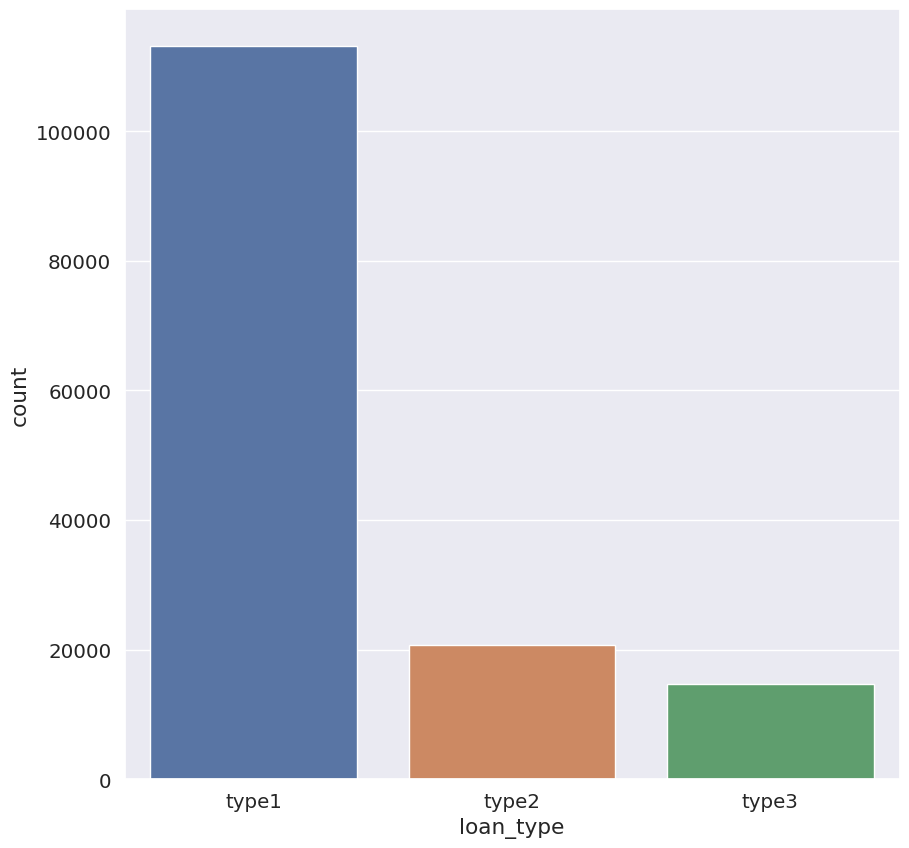

In [ ]:
sns.countplot(data=df , x='loan_type')

<Axes: xlabel='status', ylabel='count'>

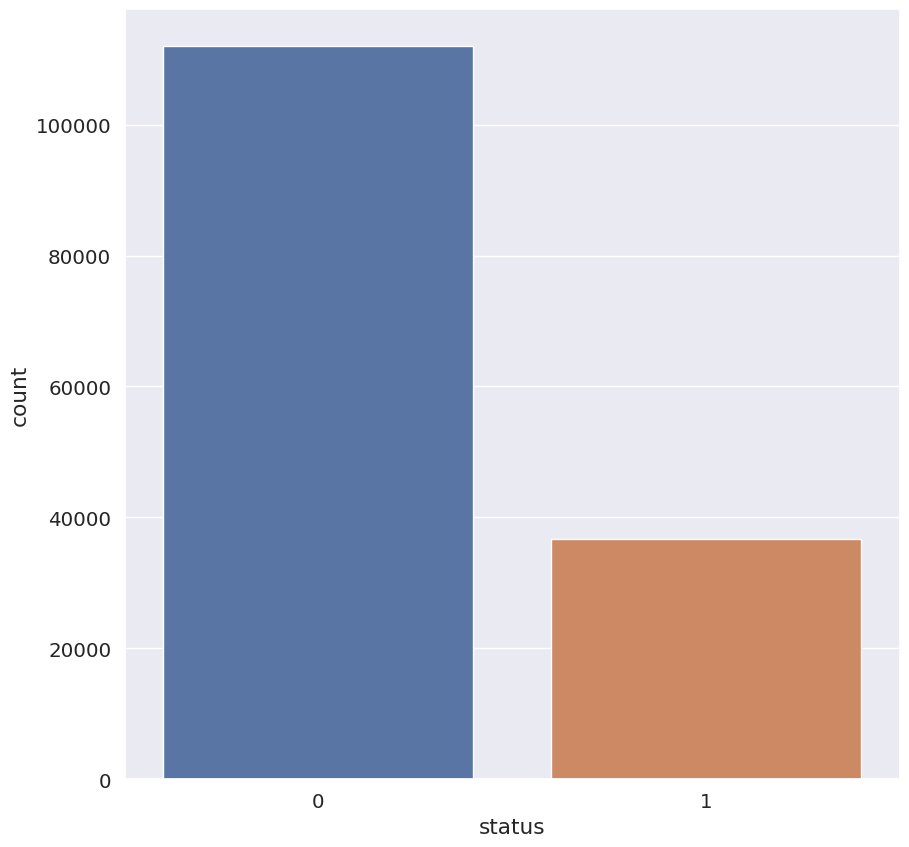

In [ ]:
sns.countplot(data=df , x='status')

<Axes: xlabel='age', ylabel='count'>

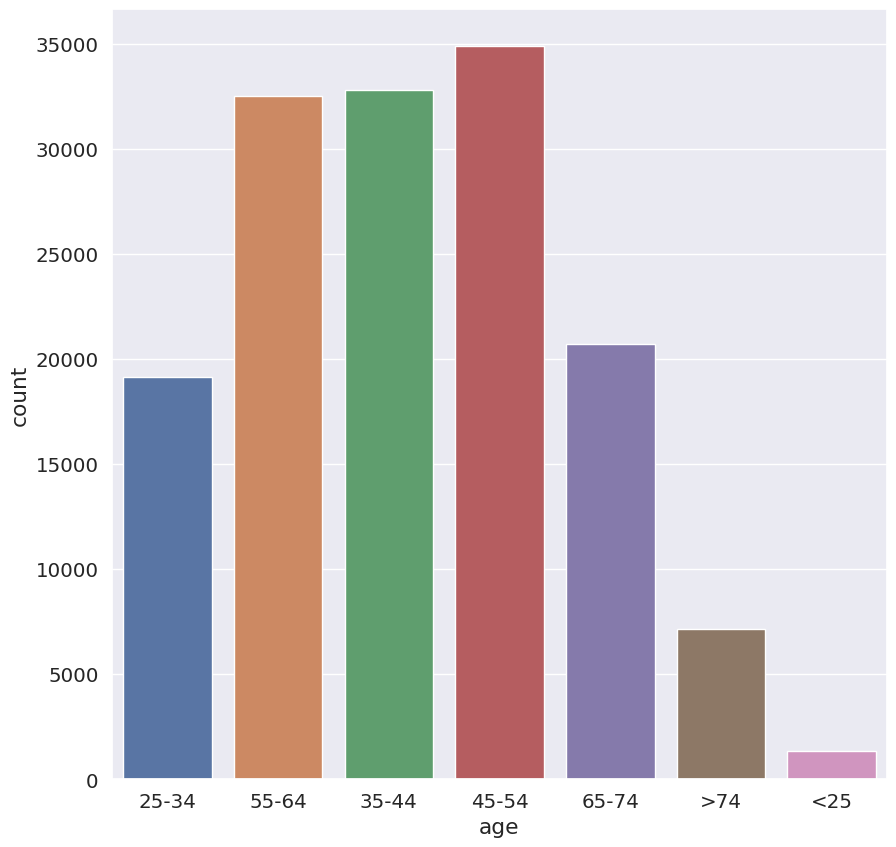

In [ ]:
sns.countplot(data=df , x='age')

<Axes: xlabel='rate_of_interest', ylabel='income'>

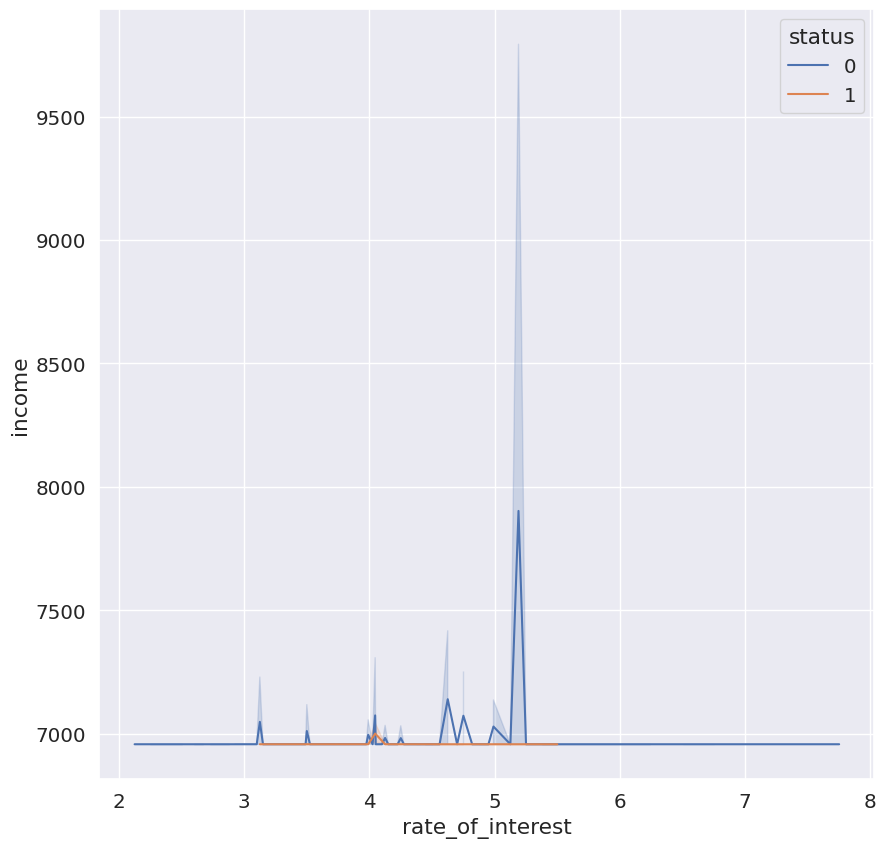

In [ ]:
sns.lineplot(data=df, x="rate_of_interest", y="income", hue="status")

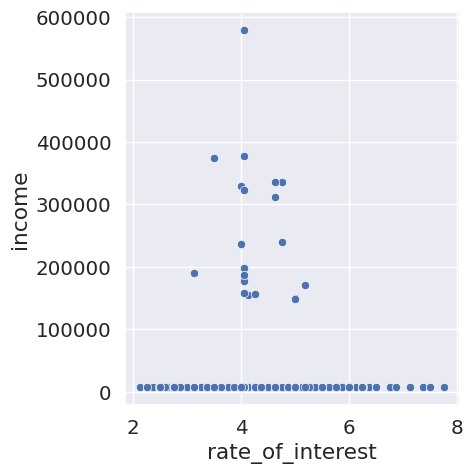

In [ ]:
sns.relplot(x ="rate_of_interest", y ="income",data = df)

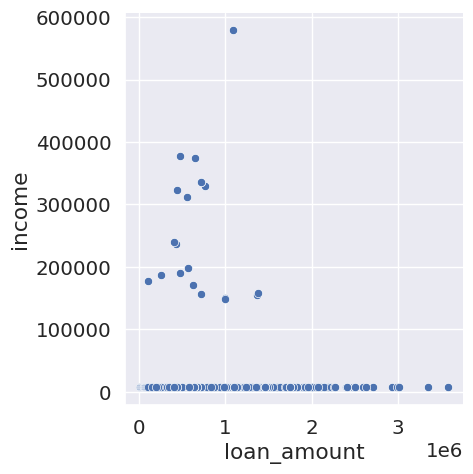

In [ ]:
sns.relplot(x ="loan_amount", y ="income",data = df)

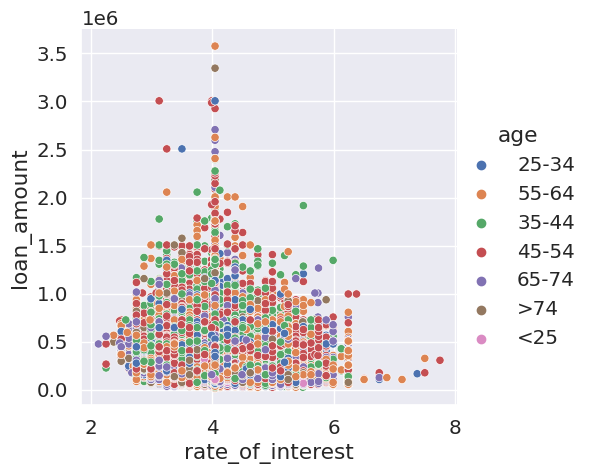

In [ ]:
sns.relplot(x ="rate_of_interest", y ="loan_amount", hue='age' ,data = df)

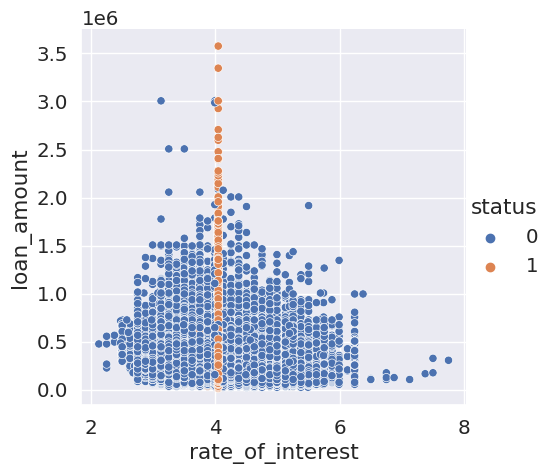

In [ ]:
sns.relplot(x ="rate_of_interest", y ="loan_amount", hue='status' ,data = df)

<ipython-input-67-bc3b6db04a56>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amount'])


<Axes: xlabel='loan_amount', ylabel='Density'>

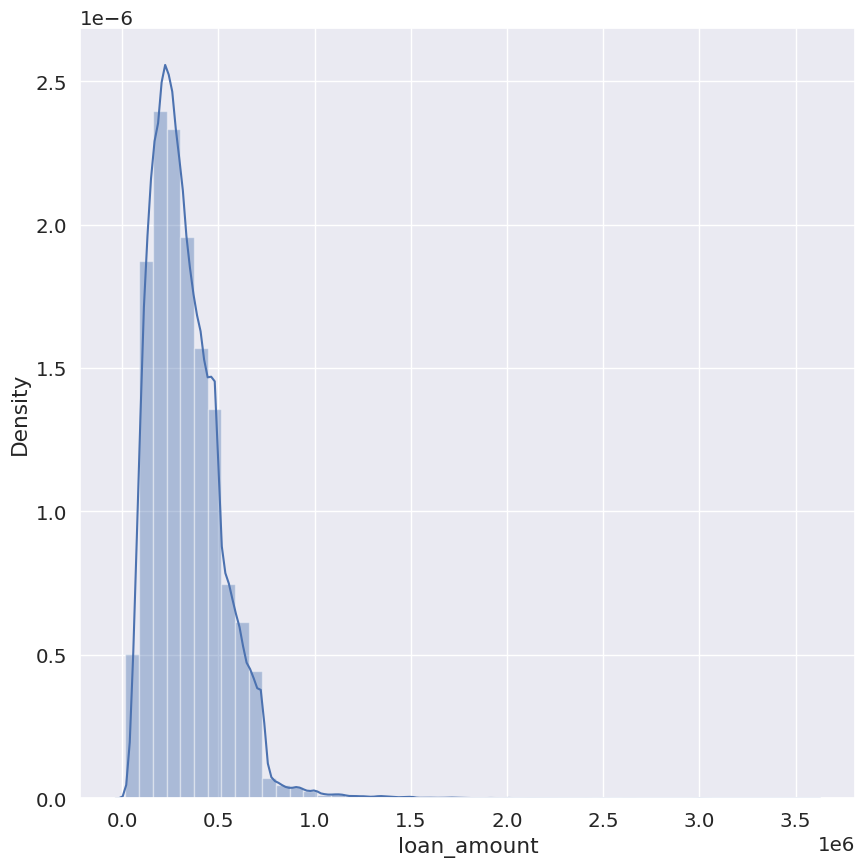

In [ ]:
sns.distplot(df['loan_amount'])

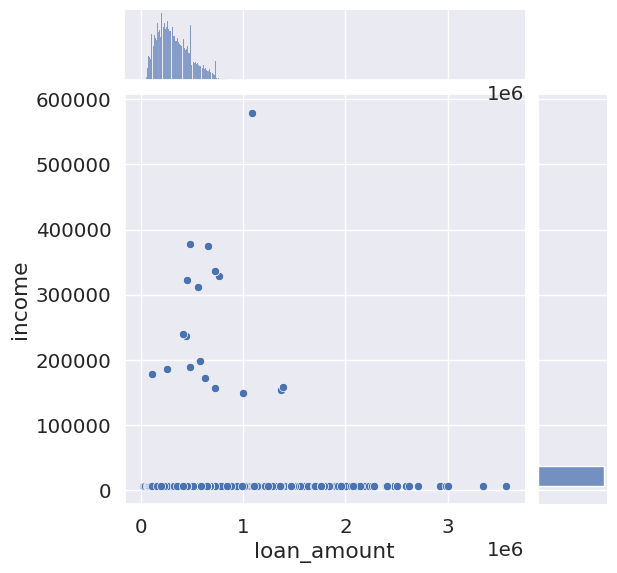

In [ ]:
sns.jointplot(data=df,x='loan_amount' , y = 'income')

<Axes: xlabel='status', ylabel='loan_amount'>

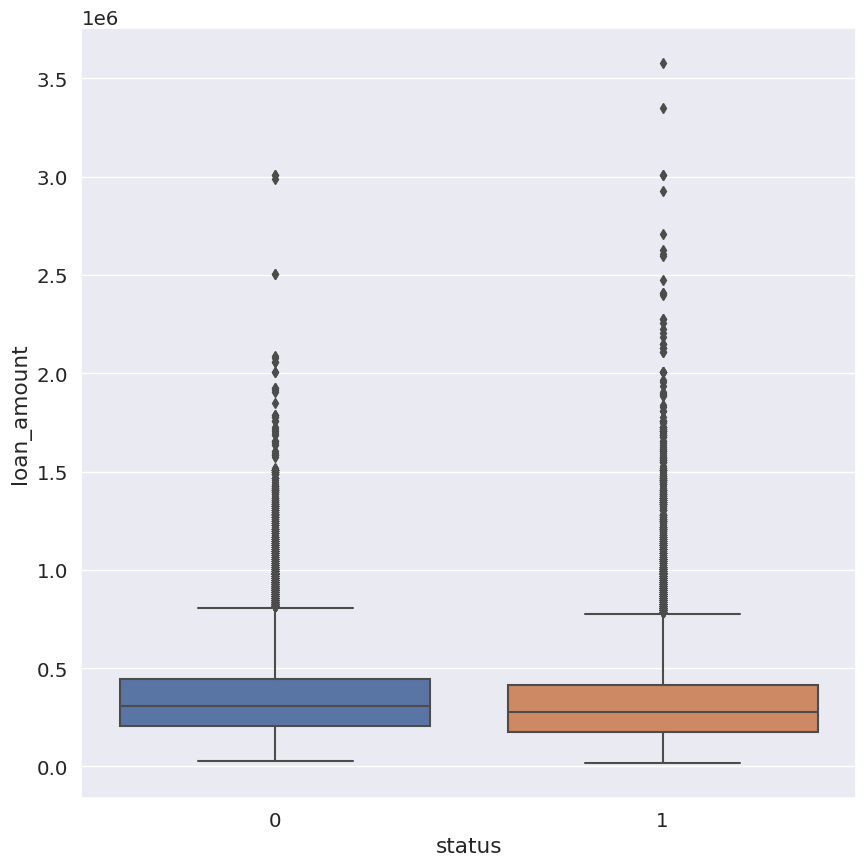

In [ ]:
sns.boxplot(data=df , x='status' , y ='loan_amount')

<Axes: xlabel='status', ylabel='term'>

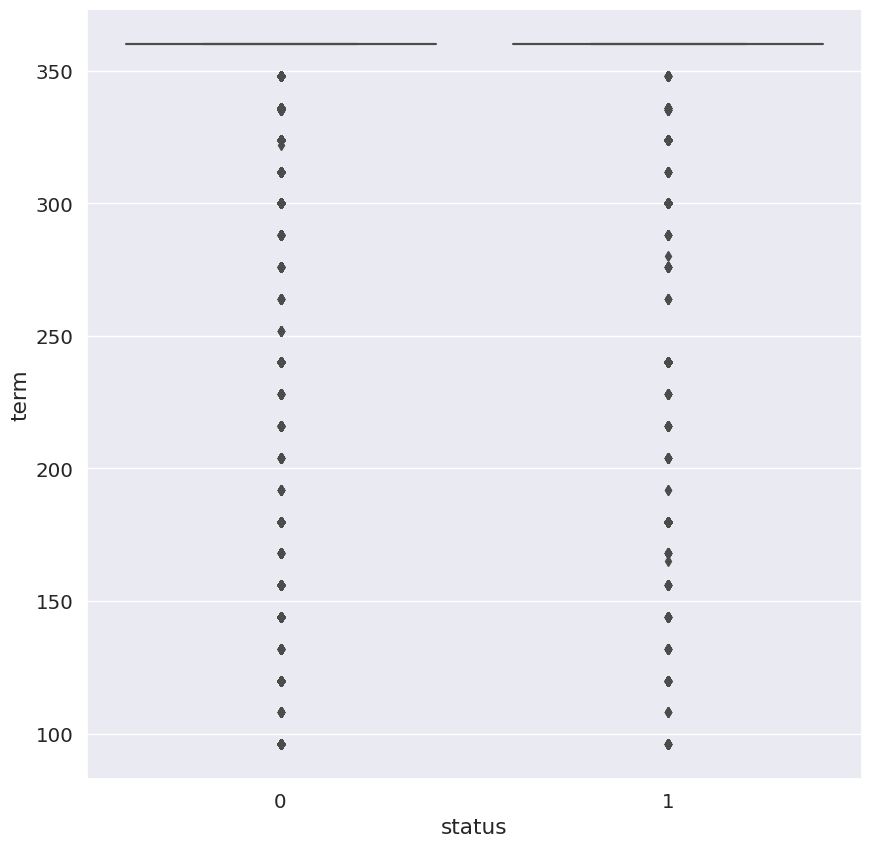

In [ ]:
sns.boxplot(data=df , x='status' , y ='term')

<Axes: xlabel='status', ylabel='income'>

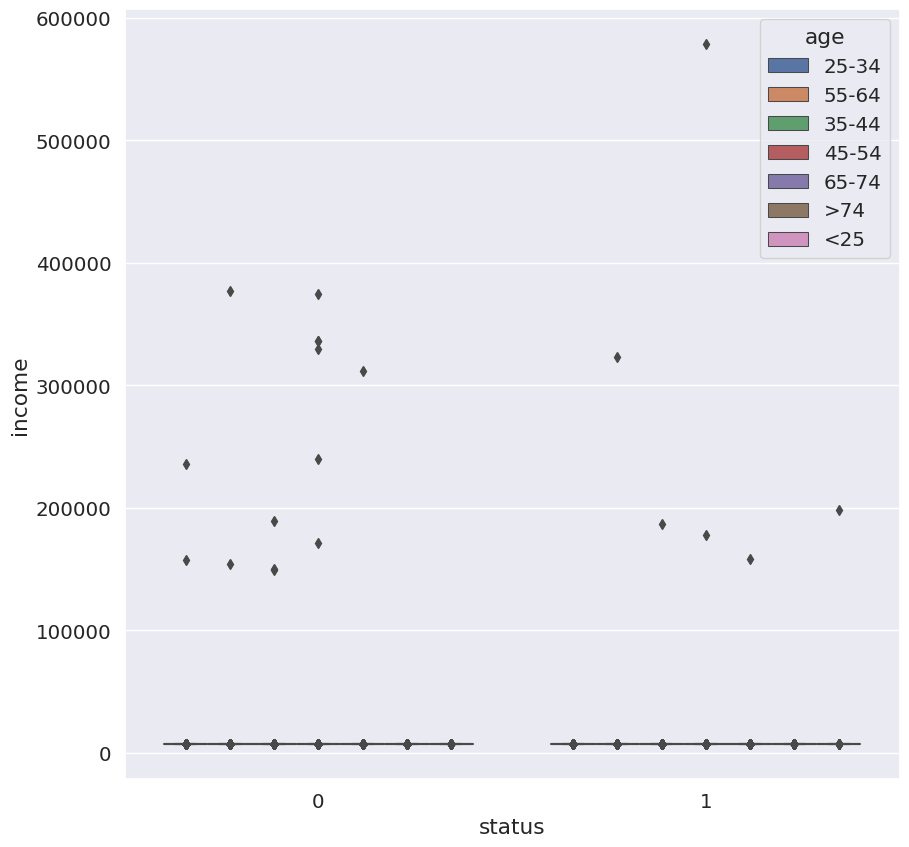

In [ ]:
sns.boxplot(data=df , x='status' , y ='income' , hue='age')

<Axes: xlabel='age', ylabel='credit_score'>

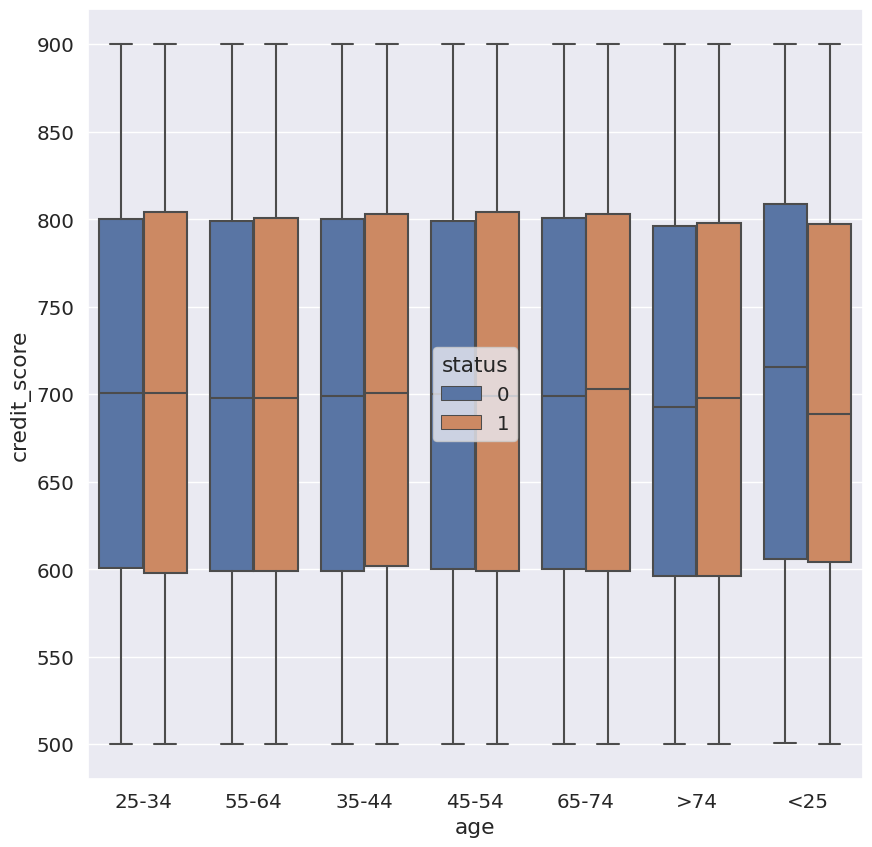

In [ ]:
sns.boxplot(data=df , x='age' , y ='credit_score' , hue='status')

<ipython-input-73-19b7fba43d4c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() , annot = True)


<Axes: >

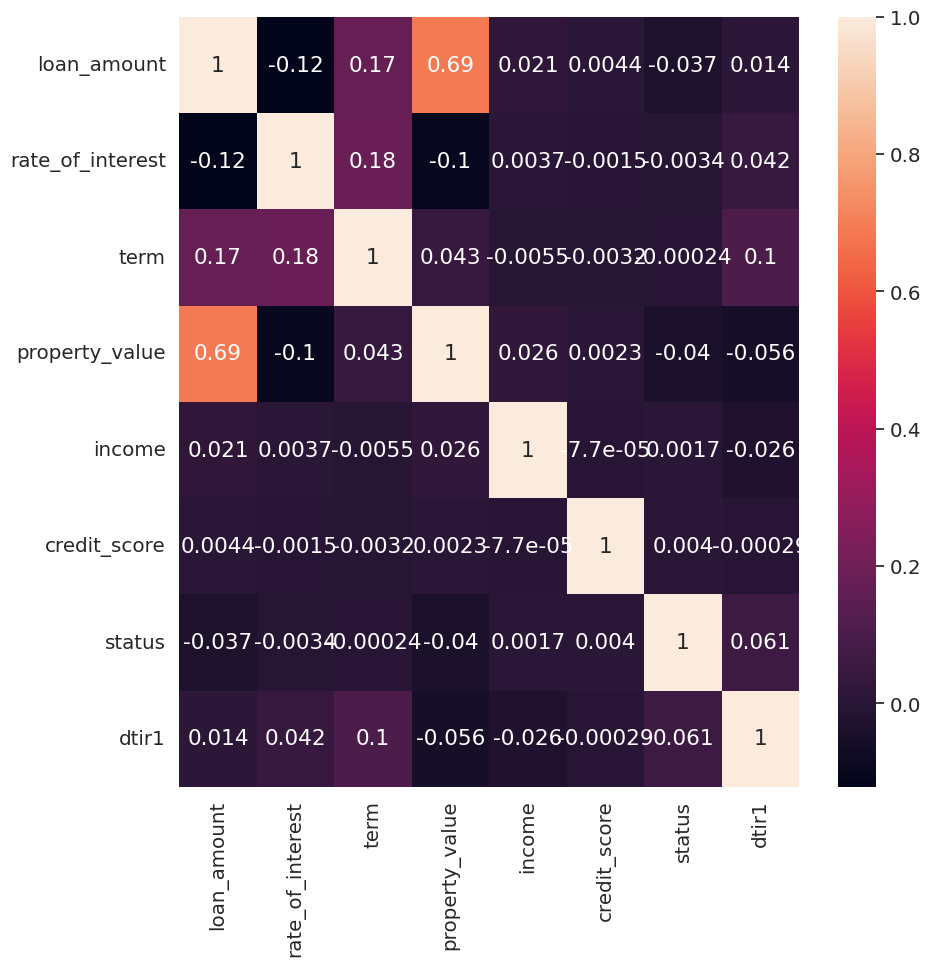

In [ ]:
sns.heatmap(df.corr() , annot = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148664 entries, 0 to 148669
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_type         148664 non-null  object 
 1   loan_amount       148664 non-null  int64  
 2   rate_of_interest  148664 non-null  float64
 3   term              148664 non-null  float64
 4   property_value    148664 non-null  float64
 5   income            148664 non-null  float64
 6   credit_score      148664 non-null  int64  
 7   age               148664 non-null  object 
 8   status            148664 non-null  int64  
 9   dtir1             148664 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 16.5+ MB


In [ ]:
df = pd.get_dummies(df, columns=['loan_type','age'], drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148664 entries, 0 to 148669
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_amount       148664 non-null  int64  
 1   rate_of_interest  148664 non-null  float64
 2   term              148664 non-null  float64
 3   property_value    148664 non-null  float64
 4   income            148664 non-null  float64
 5   credit_score      148664 non-null  int64  
 6   status            148664 non-null  int64  
 7   dtir1             148664 non-null  float64
 8   loan_type_type2   148664 non-null  uint8  
 9   loan_type_type3   148664 non-null  uint8  
 10  age_35-44         148664 non-null  uint8  
 11  age_45-54         148664 non-null  uint8  
 12  age_55-64         148664 non-null  uint8  
 13  age_65-74         148664 non-null  uint8  
 14  age_<25           148664 non-null  uint8  
 15  age_>74           148664 non-null  uint8  
dtypes: float64(5), int64

In [ ]:
pd.set_option("display.max_columns", df.shape[-1])
df.head()

,loan_amount,rate_of_interest,term,property_value,income,credit_score,status,dtir1,loan_type_type2,loan_type_type3,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
0,116500,4.045482,360.0,118000.000000,6957.392164,758,1,45.000000,0,0,0,0,0,0,0,0
1,206500,4.045482,360.0,497900.200647,6957.392164,552,1,37.732932,1,0,0,0,1,0,0,0
2,406500,4.560000,360.0,508000.000000,6957.392164,834,0,46.000000,0,0,1,0,0,0,0,0
3,456500,4.250000,360.0,658000.000000,6957.392164,587,0,42.000000,0,0,0,1,0,0,0,0
4,696500,4.045482,360.0,758000.000000,6957.392164,602,0,39.000000,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(148664, 16)

In [ ]:
x = df.drop('status', axis=1)
y = df['status']

In [ ]:
x

,loan_amount,rate_of_interest,term,property_value,income,credit_score,dtir1,loan_type_type2,loan_type_type3,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
0,116500,4.045482,360.0,118000.000000,6957.392164,758,45.000000,0,0,0,0,0,0,0,0
1,206500,4.045482,360.0,497900.200647,6957.392164,552,37.732932,1,0,0,0,1,0,0,0
2,406500,4.560000,360.0,508000.000000,6957.392164,834,46.000000,0,0,1,0,0,0,0,0
3,456500,4.250000,360.0,658000.000000,6957.392164,587,42.000000,0,0,0,1,0,0,0,0
4,696500,4.045482,360.0,758000.000000,6957.392164,602,39.000000,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,436500,3.125000,180.0,608000.000000,6957.392164,659,48.000000,0,0,0,0,1,0,0,0
148666,586500,5.190000,360.0,788000.000000,6957.392164,569,15.000000,0,0,0,0,0,0,0,0
148667,446500,3.125000,180.0,728000.000000,6957.392164,702,49.000000,0,0,0,1,0,0,0,0
148668,196500,3.500000,180.0,278000.000000,6957.392164,737,29.000000,0,0,0,0,1,0,0,0


In [ ]:
y

0         1
1         1
2         0
3         0
4         0
         ..
148665    0
148666    0
148667    0
148668    0
148669    0
Name: status, Length: 148664, dtype: int64

In [ ]:
x.shape

(148664, 15)

In [ ]:
y.shape

(148664,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)

In [ ]:
x_train

,loan_amount,rate_of_interest,term,property_value,income,credit_score,dtir1,loan_type_type2,loan_type_type3,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
5812,436500,4.560000,360.0,498000.0,6957.392164,564,22.000000,0,0,1,0,0,0,0,0
89037,236500,3.990000,360.0,328000.0,6957.392164,865,28.000000,0,0,0,0,0,1,0,0
81793,276500,2.990000,300.0,468000.0,6957.392164,705,37.732932,0,1,0,0,0,0,0,1
34218,1686500,3.875000,360.0,2408000.0,6957.392164,625,39.000000,0,0,0,1,0,0,0,0
115386,1046500,4.045482,360.0,1308000.0,6957.392164,563,37.732932,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24770,506500,4.045482,240.0,1188000.0,6957.392164,884,49.000000,0,0,0,0,0,1,0,0
103476,276500,3.625000,360.0,428000.0,6957.392164,695,42.000000,0,0,0,0,0,0,0,1
11281,366500,3.990000,360.0,508000.0,6957.392164,818,40.000000,0,0,0,0,0,1,0,0
116370,216500,4.045482,360.0,278000.0,6957.392164,612,40.000000,1,0,0,0,0,1,0,0


In [ ]:
x_train.shape

(104064, 15)

In [ ]:
x_test

,loan_amount,rate_of_interest,term,property_value,income,credit_score,dtir1,loan_type_type2,loan_type_type3,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
33458,256500,3.990000,360.0,368000.0,6957.392164,798,41.0,0,0,0,0,1,0,0,0
42974,236500,4.500000,324.0,248000.0,6957.392164,725,56.0,1,0,0,1,0,0,0,0
83271,256500,3.375000,240.0,718000.0,6957.392164,800,30.0,0,0,1,0,0,0,0,0
131194,196500,3.375000,360.0,238000.0,6957.392164,667,37.0,0,0,1,0,0,0,0,0
25029,56500,4.625000,300.0,88000.0,6957.392164,803,58.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46773,226500,3.250000,240.0,328000.0,6957.392164,642,36.0,0,0,0,0,0,1,0,0
53599,136500,4.500000,180.0,168000.0,6957.392164,604,29.0,0,0,0,0,1,0,0,0
94664,436500,4.045482,300.0,988000.0,6957.392164,516,52.0,0,0,0,0,1,0,0,0
32361,196500,3.750000,180.0,318000.0,6957.392164,621,44.0,0,0,0,0,0,1,0,0


In [ ]:
x_test.shape

(44600, 15)

In [ ]:
y_train

5812      0
89037     0
81793     0
34218     0
115386    0
         ..
24770     0
103476    0
11281     0
116370    1
127156    1
Name: status, Length: 104064, dtype: int64

In [ ]:
x_train.shape

(104064, 15)

In [ ]:
y_train.shape

(104064,)

In [ ]:
y_train.value_counts()

0    78552
1    25512
Name: status, dtype: int64

In [ ]:
#sm = SMOTE()
#x_train, y_train = sm.fit_resample(x_train, y_train)

In [ ]:
y_train.value_counts()

0    78552
1    25512
Name: status, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
cms=confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test,y_pred))

0.9681165919282512


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     33475
           1       0.94      0.93      0.94     11125

    accuracy                           0.97     44600
   macro avg       0.96      0.96      0.96     44600
weighted avg       0.97      0.97      0.97     44600



<Axes: >

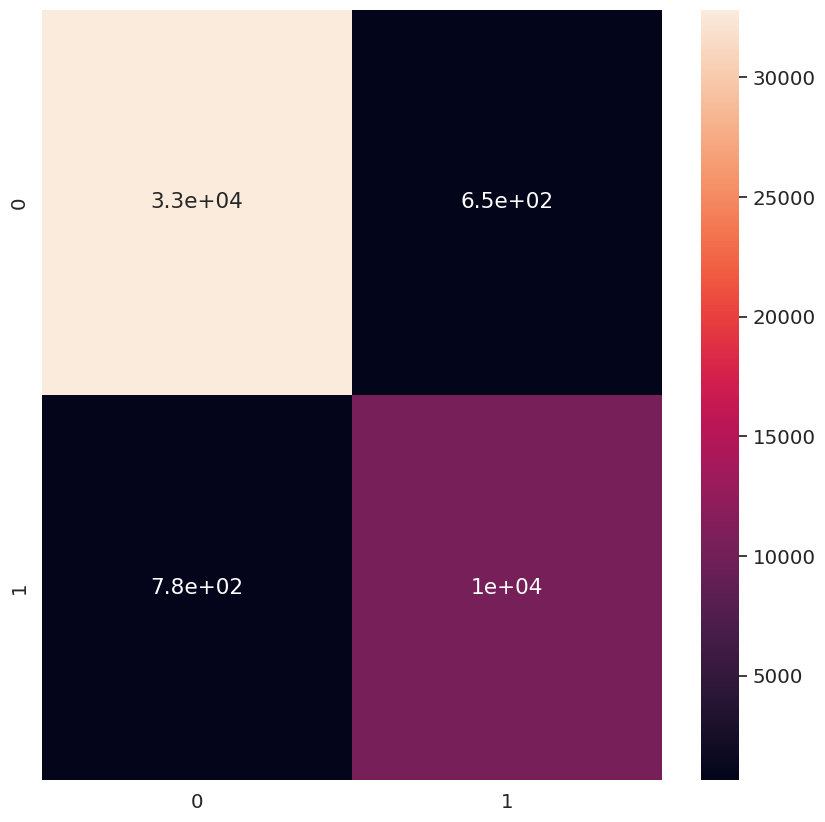

In [ ]:
import seaborn as sns
sns.heatmap(cms, annot=True)


In [ ]:
print(f'training accuaracy: {model.score(x_train,y_train)}')
print(f'testing accuaracy: {model.score(x_test,y_test)}')

training accuaracy: 1.0
testing accuaracy: 0.9681165919282512


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test,y_pred))

0.9765470852017937


<Axes: >

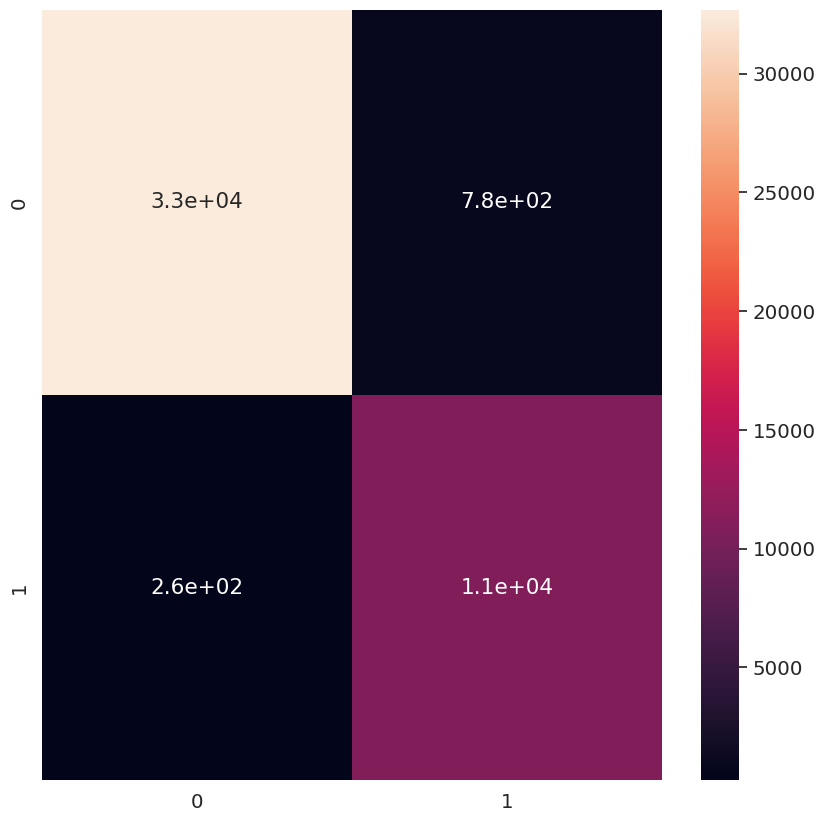

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     33475
           1       0.93      0.98      0.95     11125

    accuracy                           0.98     44600
   macro avg       0.96      0.98      0.97     44600
weighted avg       0.98      0.98      0.98     44600



In [ ]:
print(f'training accuaracy: {model.score(x_train,y_train)}')
print(f'testing accuaracy: {model.score(x_test,y_test)}')

training accuaracy: 1.0
testing accuaracy: 0.9765470852017937


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model=KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

cmk=confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test,y_pred))

0.8445291479820628


<Axes: >

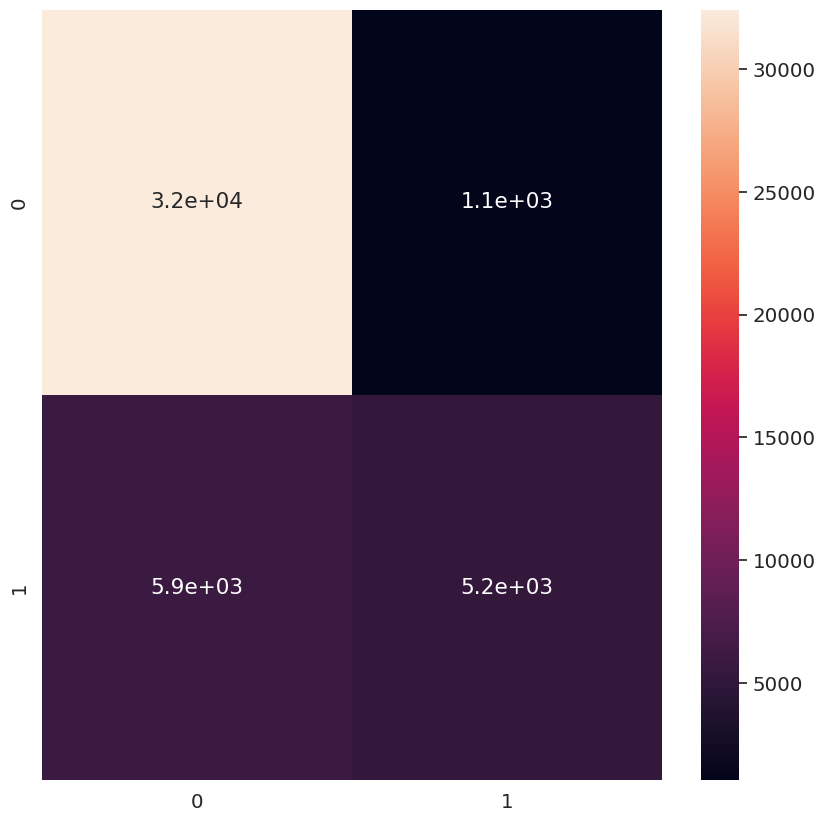

In [ ]:
import seaborn as sns
sns.heatmap(cmk, annot=True)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90     33475
           1       0.83      0.47      0.60     11125

    accuracy                           0.84     44600
   macro avg       0.84      0.72      0.75     44600
weighted avg       0.84      0.84      0.83     44600



In [ ]:
print(f'training accuaracy: {model.score(x_train,y_train)}')
print(f'testing accuaracy: {model.score(x_test,y_test)}')

training accuaracy: 0.8699934655596556
testing accuaracy: 0.8445291479820628


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

cml=confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test,y_pred))

0.750560538116592


<Axes: >

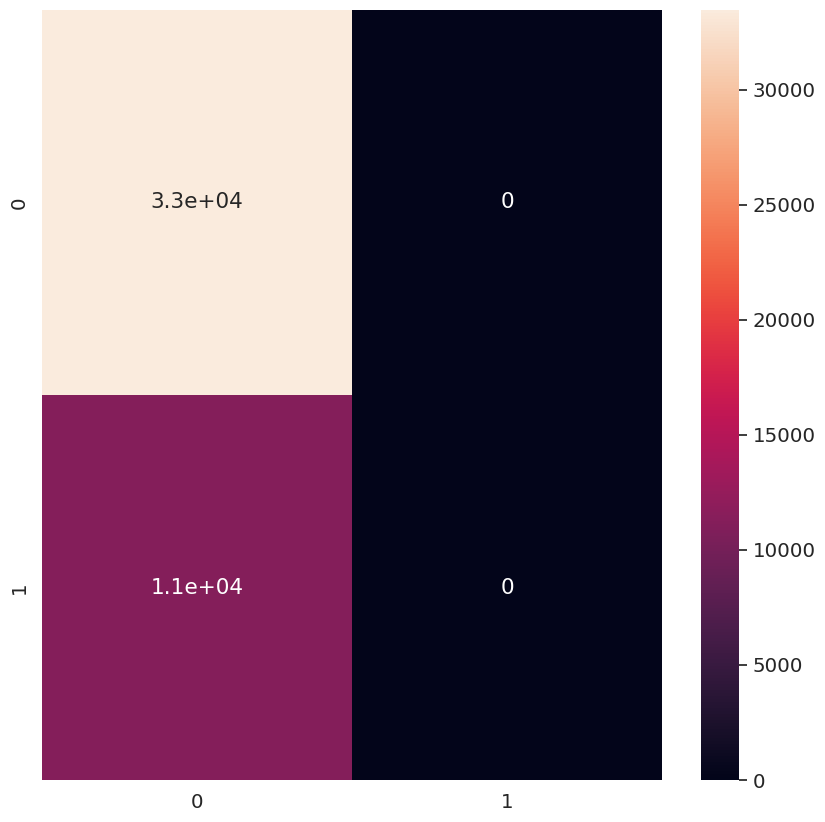

In [ ]:
import seaborn as sns
sns.heatmap(cml, annot=True)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     33475
           1       0.00      0.00      0.00     11125

    accuracy                           0.75     44600
   macro avg       0.38      0.50      0.43     44600
weighted avg       0.56      0.75      0.64     44600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(f'training accuaracy: {model.score(x_train,y_train)}')
print(f'testing accuaracy: {model.score(x_test,y_test)}')

training accuaracy: 0.7548431734317343
testing accuaracy: 0.750560538116592
